In [8]:
library(haven)

In [9]:
data = read_dta('turnout.dta')

In [10]:
head(data)

white,age,educate,income,turnout,agesqrd
0,38,17,4.375358,1,14.44
1,74,12,2.419293,1,54.76
1,30,12,1.286834,0,9.00
1,21,14,1.904539,1,4.41
1,24,16,6.949129,1,5.76
1,42,13,1.492735,0,17.64


In [11]:
38^2*.01

[1] 14.44

In [12]:
lm2  = glm(turnout~1+white+age+educate+income+agesqrd, data=data, family=binomial)


In [13]:
38^2*.01

[1] 14.44

In [14]:
vec = c(1,0,38,12,4,14.44)
vec

[1]  1.00  0.00 38.00 12.00  4.00 14.44

In [15]:
vec = c(1,0,38,12,4,14.44)
logit = sum(coef(lm2)*vec)
exp(logit) / (1 + exp(logit))

[1] 0.7426839

In [16]:
vec2 = c(1,0,38,20,4,14.44)
logit2 = sum(coef(lm2)*vec2)
exp(logit2) / (1 + exp(logit2))

[1] 0.9245096

In [17]:
vec3 = c(1,0.861,38,16,3.986,14.44)
logit3 = sum(coef(lm2)*vec3)
exp(logit3) / (1 + exp(logit3))

[1] 0.8676595

In [18]:
mean(data$income)
mean(data$white)

[1] 3.985987

[1] 0.8607059

In [19]:
library(arm)
library(Matching)

In [50]:
set.seed(42)
sim_results <- sim(lm2, n.sims = 1000)

In [ ]:
#vec3 = c(1,0.861,38,16,3.986,14.44)

for(i in 1:1000){
    storage[i] = exp(sum(sim_results@coef[i,]*vec3))/(1 + exp(sum(sim_results@coef[i,]*vec3)))
}




In [ ]:
quantile(storage, probs = c(0.005, 0.995))

In [61]:
sum(sim_results@coef*vec3)

[1] -52374.69

In [65]:
df$age = c(storage)

ERROR: Error in df$age = c(storage): object of type 'closure' is not subsettable


In [ ]:
storage.matrix_undergrad <- matrix(NA, nrow = 1000, ncol = 78)
for (age in c(18:95)) {
  for (i in 1:1000)
  {
    undergrad_person <- c(mean(data$white), age, 16, mean(data$income), 0.01*age**2)
    storage.matrix_highschool[i, age - 17] <- exp(sum(sim_results@coef[i,]*undergrad_person))/(1 + exp(sum(sim_results@coef[i,]*undergrad_person)))
  }
}

In [72]:
storage.matrix_highschool <- matrix(NA, nrow = 1000, ncol = 78)
for (age in c(18:95)) {
  for (i in 1:1000)
  {
    highschool_person <- c(1,mean(data$white), age, 12, mean(data$income), 0.01*age**2)
    storage.matrix_highschool[i, age - 17] <- exp(sum(sim_results@coef[i,]*highschool_person))/(1 + exp(sum(sim_results@coef[i,]*highschool_person)))
  }
}

NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [73]:
head(storage.matrix_highschool)

0.4712253,0.4906491,0.5097247,0.5283969,0.5466168,0.5643424,0.5815386,0.5981771,0.6142356,0.6296983,⋯,0.8514423,0.8483059,0.8449181,0.8412678,0.8373431,0.8331313,0.8286191,0.8237921,0.8186353,0.8131332
0.4601399,0.4810601,0.5016235,0.5217586,0.5414028,0.5605018,0.5790104,0.5968921,0.6141185,0.6306693,⋯,0.8445053,0.8403628,0.8358991,0.8310979,0.8259422,0.8204135,0.8144928,0.8081600,0.8013942,0.7941736
0.4681090,0.4880207,0.5075827,0.5267347,0.5454236,0.5636039,0.5812371,0.5982924,0.6147456,0.6305792,⋯,0.8538077,0.8505705,0.8470736,0.8433050,0.8392519,0.8349006,0.8302369,0.8252452,0.8199096,0.8142131
0.4651647,0.4850585,0.5046101,0.5237586,0.5424505,0.5606397,0.5782872,0.5953614,0.6118376,0.6276977,⋯,0.8498864,0.8465070,0.8428592,0.8389306,0.8347080,0.8301773,0.8253238,0.8201316,0.8145843,0.8086647
0.4871468,0.5059599,0.5243936,0.5424004,0.5599390,0.5769745,0.5934783,0.6094278,0.6248061,0.6396017,⋯,0.8526708,0.8496855,0.8464618,0.8429895,0.8392576,0.8352543,0.8309674,0.8263836,0.8214892,0.8162696
0.4660371,0.4863763,0.5063459,0.5258817,0.5449270,0.5634338,0.5813617,0.5986787,0.6153602,0.6313887,⋯,0.8361178,0.8317865,0.8271271,0.8221238,0.8167595,0.8110163,0.8048756,0.7983180,0.7913231,0.7838702


In [78]:
conf.intervals_undergrad <- apply(storage.matrix_undergrad, 2, quantile, probs = c(0.005, 0.995))
conf.intervals_highschool <- apply(storage.matrix_highschool, 2, quantile, probs = c(0.005, 0.995))

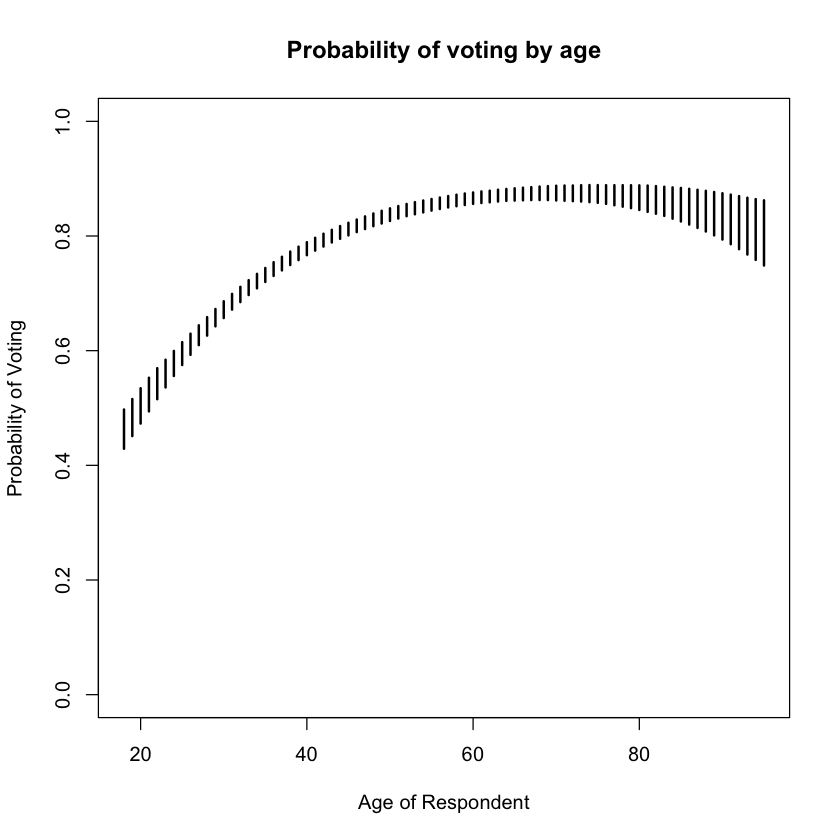

In [79]:
plot(x = c(1:100), y = c(1:100), type = "n", xlim = c(18,95), ylim = c(0,1), 
     main = "Probability of voting by age", xlab = "Age of Respondent", 
     ylab = "Probability of Voting")

for (age in 18:95) {
  segments(
    x0 = age,
    y0 = conf.intervals_undergrad[1, age - 17],
    x1 = age,
    y1 = conf.intervals_undergrad[2, age - 17],
    lwd = 2)
}

for (age in 18:95) {
  segments(
    x0 = age,
    y0 = conf.intervals_highschool[1, age - 17],
    x1 = age,
    y1 = conf.intervals_highschool[2, age - 17],
    lwd = 2)
}